In [1]:
# 기본
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 경고 뜨지 않게 설정
import warnings
warnings.filterwarnings('ignore')

# 그래프 설정
sns.set()

# 그래프 기본 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False

In [2]:
df1 = pd.read_csv('data/냉간단조_데이터셋_unique1_drop.csv')

In [7]:
df2 = df1[['MAIN_MOTOR_ALM', 'TONGS_INVERTER_ALM_ERR_CD', 'CUTTING_INVERTER_ALM_ERR_CD','TRANS_INVERTER_ALM_ERR_CD'
           ,'KO1_MOTOR_INVERTER_ALM','KO2_MOTOR_INVERTER_ALM','KO3_MOTOR_INVERTER_ALM','KO4_MOTOR_INVERTER_ALM','KO5_MOTOR_INVERTER_ALM',
            'KO6_MOTOR_INVERTER_ALM', 'OUTPUT_COUNT_SUM','OUTPUT_COUNT_DAY_1','OUTPUT_COUNT_DAY_2']]

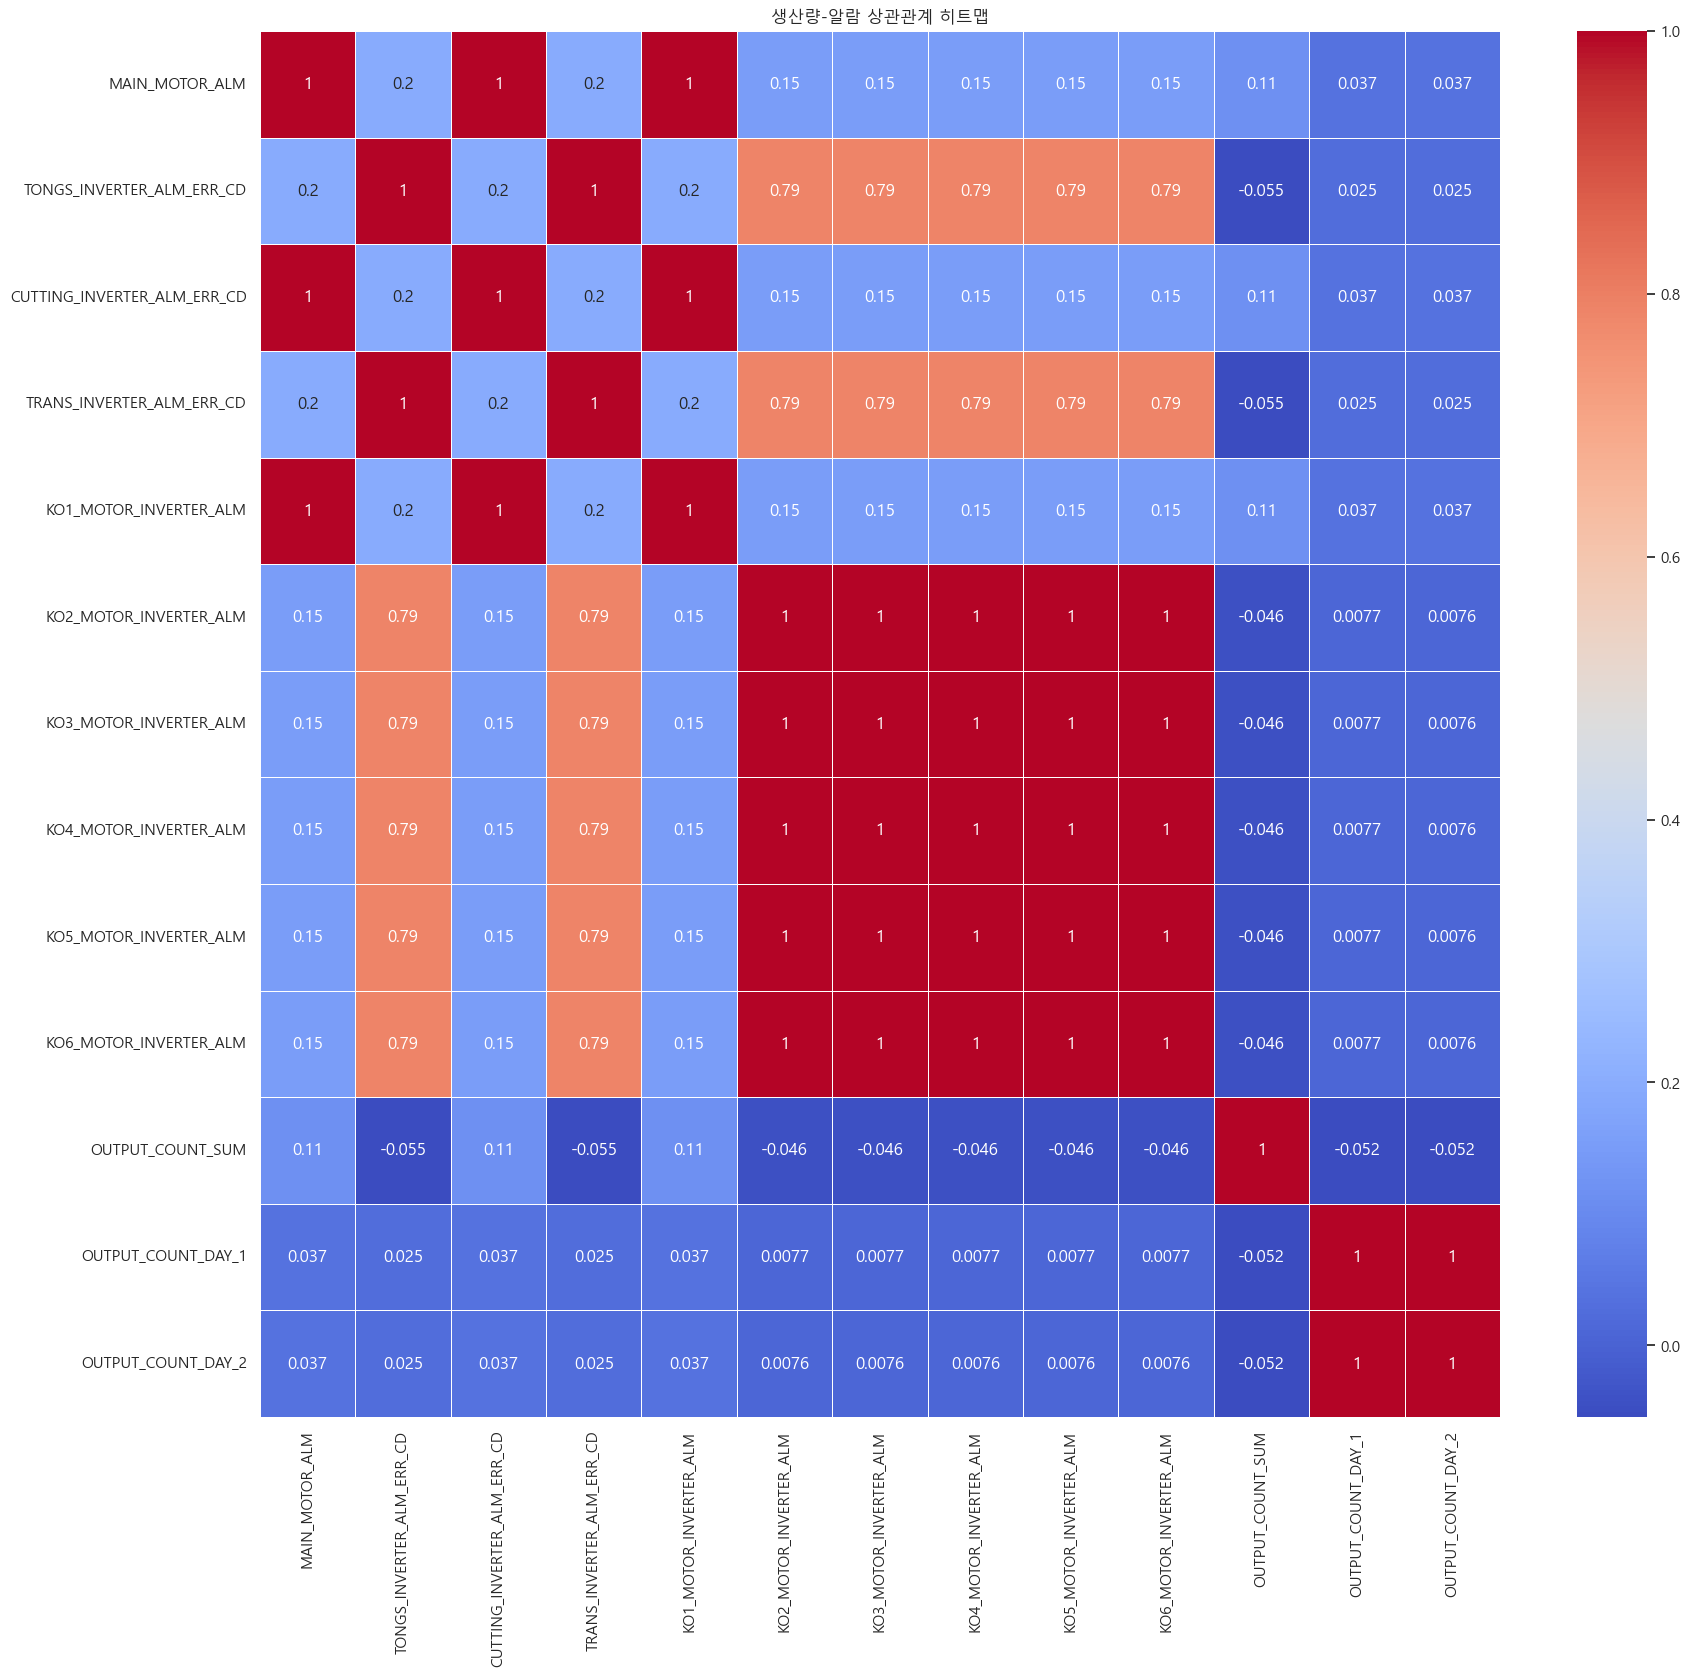

In [12]:
# 상관관계 행렬 계산
corr_matrix = df2.corr()

# 시각화 (옵션)
plt.figure(figsize=(20, 18))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', annot_kws={"size": 12} , linewidths=0.5,linecolor='white')
plt.title("생산량-알람 상관관계 히트맵")
plt.show()

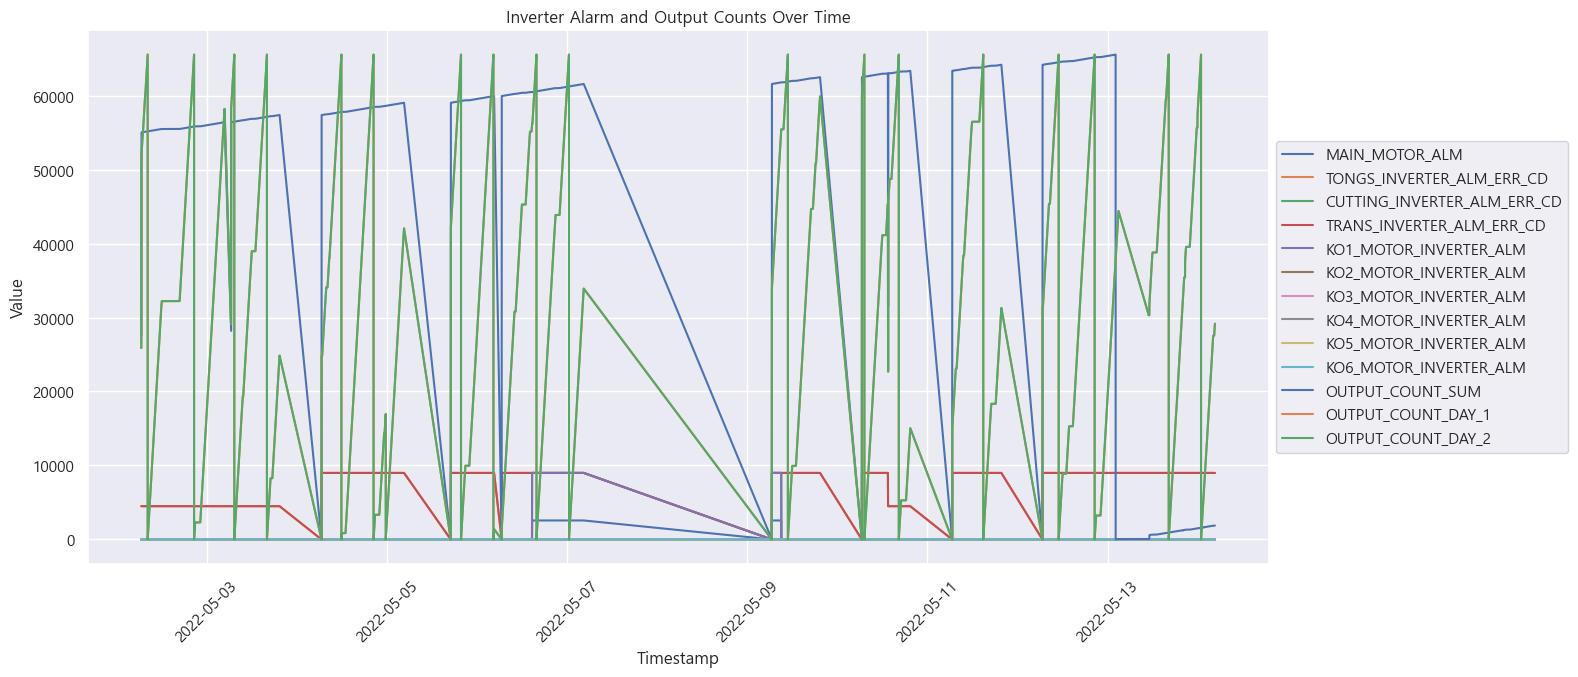

In [11]:
# ✅ 1. 사용 컬럼 목록
cols_to_plot = [
    'MAIN_MOTOR_ALM', 'TONGS_INVERTER_ALM_ERR_CD', 'CUTTING_INVERTER_ALM_ERR_CD',
    'TRANS_INVERTER_ALM_ERR_CD', 'KO1_MOTOR_INVERTER_ALM', 'KO2_MOTOR_INVERTER_ALM',
    'KO3_MOTOR_INVERTER_ALM', 'KO4_MOTOR_INVERTER_ALM', 'KO5_MOTOR_INVERTER_ALM',
    'KO6_MOTOR_INVERTER_ALM', 'OUTPUT_COUNT_SUM', 'OUTPUT_COUNT_DAY_1', 'OUTPUT_COUNT_DAY_2'
]

# ✅ 2. Timestamp 컬럼이 datetime 형식인지 확인
df1['Timestamp'] = pd.to_datetime(df1['Timestamp'])

# ✅ 3. 그래프 그리기
plt.figure(figsize=(16, 7))

for col in cols_to_plot:
    plt.plot(df1['Timestamp'], df1[col], label=col)

# ✅ 4. 그래프 스타일 설정
plt.title('Inverter Alarm and Output Counts Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))  # 오른쪽 범례
plt.tight_layout()
plt.grid(True)

plt.show()